In [1]:
import pywt
import eeglib
import pyedflib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

1. GETTING INTO THE DATASET 

In [22]:
#OPENING ONE FILE FROM HEALTHY PEOPLE
f=pyedflib.data.get_generator_filename()
f=pyedflib.EdfReader('h01.edf')
n=f.signals_in_file
signal_labels=list(f.getSignalLabels())
duration=f.getFileDuration()
sample=f.readSignal(3)

n_samples=[]
for i in range(19):
    r=f.readSignal(i)
    n_samples.append(len(r))


In [23]:
print("The number of channels in each sample are: ",n)
print("The labels of each channels are: \n",signal_labels)
print("The duration of sampling from EEG is: ",duration)

print("The sampling Frequency is:",len(sample)/duration,"Hertz")
print("The number of samples each channel has got are: ",n_samples)

The number of channels in each sample are:  19
The labels of each channels are: 
 ['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']
The duration of sampling from EEG is:  925
The sampling Frequency is: 250.0 Hertz
The number of samples each channel has got are:  [231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250, 231250]


In [24]:
list(sample)

[0.0024999999991076978,
 0.0024999999991076978,
 0.0024999999991076978,
 0.3083102664256955,
 0.3083102664256955,
 -0.1504051332141862,
 -0.6091205328540679,
 0.0024999999991076978,
 1.0728359324921648,
 0.3083102664256955,
 -1.3736461989205373,
 -1.526551332133831,
 -9.324713126011819,
 -10.242143925291582,
 -11.618290124211228,
 -10.089238792078289,
 -7.336946394238999,
 -5.9608001953193535,
 -1.3736461989205373,
 3.825128330331455,
 11.776195257422737,
 24.16151104769954,
 30.43062150944459,
 34.253249839776934,
 32.5712933744307,
 26.913803445538832,
 18.656926252020963,
 8.41228232673027,
 -0.1504051332141862,
 -11.465384990997933,
 -17.58159031952969,
 -19.875167317729098,
 -17.887400585956275,
 -14.064772255623929,
 -10.395049058504876,
 -8.56018745994535,
 -10.242143925291582,
 -9.936333658864994,
 -10.700859324931464,
 -9.324713126011819,
 -5.654989928892766,
 -3.973033463546533,
 0.0024999999991076978,
 4.589653996397924,
 5.507084795677687,
 9.94133365886321,
 12.84653118991

In [13]:
#OPENING ONE FILE FROM SCHIZOPHRENICS
f=pyedflib.data.get_generator_filename()
f=pyedflib.EdfReader('s03.edf')
n=f.signals_in_file
signal_labels=list(f.getSignalLabels())
duration=f.getFileDuration()
sample=f.readSignal(3)

n_samples=[]
for i in range(19):
    r=f.readSignal(i)
    n_samples.append(len(r))


In [14]:
print("The number of channels in each sample are: ",n)
print("The labels of each channels are: \n",signal_labels)
print("The duration of sampling from EEG is: ",duration)

print("The sampling Frequency is:",len(sample)/duration,"Hertz")
print("The number of samples each channel has got are: ",n_samples)

The number of channels in each sample are:  19
The labels of each channels are: 
 ['Fp2', 'F8', 'T4', 'T6', 'O2', 'Fp1', 'F7', 'T3', 'T5', 'O1', 'F4', 'C4', 'P4', 'F3', 'C3', 'P3', 'Fz', 'Cz', 'Pz']
The duration of sampling from EEG is:  964
The sampling Frequency is: 250.0 Hertz
The number of samples each channel has got are:  [241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000, 241000]


In [21]:
list(sample)

[0.0024999999991076978,
 0.0024999999991076978,
 0.0024999999991076978,
 0.3083102664256955,
 0.15540513321240157,
 -0.7620256660673617,
 -0.6091205328540679,
 1.0728359324921648,
 1.8373615985586342,
 -0.6091205328540679,
 -2.4439821314135943,
 -0.1504051332141862,
 -8.101472060305468,
 -6.725325861385823,
 -1.3736461989205373,
 -0.7620256660673617,
 -2.7497923978401824,
 -1.9852667317737127,
 -4.584653996399709,
 -7.336946394238999,
 -5.349179662466178,
 -1.9852667317737127,
 0.0024999999991076978,
 -1.832361598560419,
 -0.6091205328540679,
 1.0728359324921648,
 2.6018872646251037,
 7.341946394237214,
 10.400049058503091,
 9.94133365886321,
 4.43674886318463,
 1.2257410657054588,
 -0.9149307992806556,
 -1.3736461989205373,
 3.366412930691573,
 3.366412930691573,
 1.5315513321320464,
 1.0728359324921648,
 -1.526551332133831,
 -2.7497923978401824,
 -0.6091205328540679,
 -1.0678359324939495,
 0.3083102664256955,
 3.2135077974782793,
 3.6722231971181607,
 7.341946394237214,
 4.2838437299

In [66]:
#getting file with minimum sampling time and samples
path='/home/minte/Desktop/project fiel/'
t=[]
m=[]
for r,dir,n in os.walk(path):
    for i in n:
        if 'edf' in i.split('.'):
            file=path+i
            f=pyedflib.EdfReader(file)
            sam=len(f.readSignal(0))
            m.append(sam)
            t.append(f.getFileDuration())
            print(i," : ",f.getFileDuration()," : ",sam)
            
      

s03.edf  :  964  :  241000
h12.edf  :  900  :  225000
s04.edf  :  1205  :  301250
h02.edf  :  910  :  227500
s06.edf  :  740  :  185000
s08.edf  :  911  :  227750
h14.edf  :  865  :  216250
s02.edf  :  1145  :  286250
s07.edf  :  1346  :  336500
s09.edf  :  1185  :  296250
h05.edf  :  945  :  236250
h06.edf  :  930  :  232500
s14.edf  :  2170  :  542500
h07.edf  :  910  :  227500
s13.edf  :  1135  :  283750
h08.edf  :  910  :  227500
h03.edf  :  910  :  227500
h01.edf  :  925  :  231250
s10.edf  :  850  :  212500
h04.edf  :  925  :  231250
h13.edf  :  965  :  241250
h11.edf  :  915  :  228750
h09.edf  :  905  :  226250
h10.edf  :  1115  :  278750
s05.edf  :  890  :  222500
s11.edf  :  1360  :  340000
s01.edf  :  845  :  211250
s12.edf  :  1087  :  271750


We have understood that
1. The file with minimum sampling samples are s06.edf
2. The minimum sampling time is 740 seconds 
3. The minimum number of samples are 185000

In [68]:
#OPENINING FILE WITH MINIMUM DATA SAMPLES
f=pyedflib.data.get_generator_filename()
f=pyedflib.EdfReader('s06.edf')
n=f.signals_in_file
signal_labels=list(f.getSignalLabels())
duration=f.getFileDuration()
sample=f.readSignal(3)


In [47]:
print("The least number of samples per file in our data is: ",len(list(sample)))
print("The shortest sampling time in our dataset is: ",duration)

The least number of samples per file in our data is:  185000
The shortest sampling time in our dataset is:  740


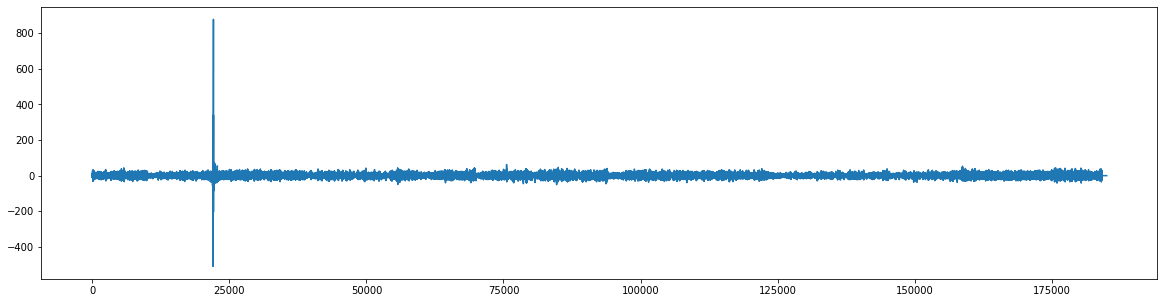

In [69]:
plt.figure(figsize=(20,5))
plt.plot(sample)


3. PREPARING AND MODIFYING THE DATASET

In [3]:
def divide_data(path,whole_list):
    #1. This function reads the signal in the file
    #2. Takes the first 185000 samples
    #3. Devide this samples into 37 places with 5000 samples each
    #4. Finally returns whole data  
    #ITERATING THROUGH THE DIRECTORY
    for r,dir,n in os.walk(path):
        #ITERATING THROUGH INDIVIDUAL .edf FILE
        for i in n:
            
            if 'edf' in i.split('.'):
                file=path+i
                f=pyedflib.EdfReader(file)
                #READING THE DATA OF EACH CHANNEL 
                for j in range(19):
                    file_list=[]
                    samples=f.readSignal(j)[:185000]
                    #DIVIDING CHANNEL SAMPELS INTO 37 EQUAL PLACES WITH 5000 SAMPLES
                    for k in range(37):
                        
                        file_list.append(samples[k*5000:(k+1)*5000])
                  
            whole_list.extend(file_list)
            f.close()
    return whole_list

    

In [32]:
#Applying devide function on healthy people data 
path=path='/home/minte/Desktop/project fiel/healthy/'
whole_data=[]
data_healthy=divide_data(path,whole_data)

In [33]:
print(len(data_healthy))
print(len(data_healthy[0]))
data_healthy=pd.DataFrame(data_healthy)
data_healthy.to_csv('data_healthy.csv')

518
5000


In [34]:
path=path='/home/minte/Desktop/project fiel/schizzo/'
whole_data=[]
data_schizz=divide_data(path,whole_data)


In [35]:
print(len(data_schizz))
print(len(data_schizz[0]))
data_schizz=pd.DataFrame(data_schizz)
data_schizz.to_csv("schizz.csv")

518
5000


In [36]:
total_data=pd.concat([data_healthy,data_schizz],axis=0)
total_data.shape

(1036, 5000)

In [22]:
total_data.to_csv('total_data.csv')

4. FEATURE EXTRACTION

1. we use wavelet transform with db1 family
2. we are going to extract
   1. Detrended Fluctuation Analysis 
   2. Higuchi Fractal Dimension 
   3. Lempel-Ziv Complexity (LZ76)
   4. Petrosian Fractal Dimension 
   5. Number of sign changes 
   6. Hjorth Activity 
   7. Hjorth Complexity
   8. Hjorth Mobility 
   9. Sample Entropy
   10. The minimum of transformed data
   11. The maximum of transformed data

In [2]:
data=pd.read_csv('total_data.csv',index_col=[0])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.003953,-2.442529,-1.983814,-1.830909,-2.595434,-1.830909,-2.289624,-1.066383,-2.442529,-2.442529,...,1.991719,1.991719,0.768478,-1.066383,-1.525098,-3.512864,-3.512864,-1.830909,-2.595434,-1.830909
1,-2.442529,-1.830909,0.615573,0.921383,1.380098,1.685909,3.062054,5.967251,5.661441,5.814346,...,-3.818675,-1.830909,-0.148953,0.615573,1.227193,1.685909,0.462668,2.603339,3.673675,3.520770
2,3.062054,3.979485,3.520770,2.756244,2.756244,2.297529,-1.066383,-2.595434,-2.289624,-4.277390,...,-1.678003,-1.525098,-2.442529,-1.678003,-3.359959,-3.512864,-3.359959,-4.277390,-6.265156,-6.265156
3,-5.500631,-3.665770,-3.971580,-3.665770,-2.748339,-3.359959,-1.372193,-3.359959,-3.971580,-4.277390,...,3.520770,3.826580,3.367864,2.450434,1.838814,1.685909,1.533003,1.380098,-0.913478,-1.372193
4,-1.219288,-1.830909,-1.219288,-1.525098,-0.454763,-1.066383,-0.760573,-0.454763,-1.830909,-2.136719,...,1.991719,0.003953,1.991719,0.768478,-0.454763,1.227193,-1.066383,-0.301858,-0.607668,-0.913478


In [3]:
data_array=data.to_numpy()
features=["DFA","HFD","LZC","PFD","CountSignChanges","hjorthActivity","hjorthComplexity","hJorthMobility","samplEntropy","minumum","maximum"]
def feature_extraction(data):
    features_data=[]
    for array in data:
       
        #Wavelet transform
        wt=pywt.Wavelet('db1')
        CA,CD=pywt.dwt(array,wavelet=wt,mode='zero')
        transformed_data=CA+CD
        dfa=eeglib.features.DFA(transformed_data)
        hfd=eeglib.features.HFD(transformed_data)
        lzc=eeglib.features.LZC(transformed_data)
        pfd=eeglib.features.PFD(transformed_data)
        sign_change=eeglib.features.countSignChanges(transformed_data)
        hj_activity=eeglib.features.hjorthActivity(transformed_data)
        hj_complexity=eeglib.features.hjorthComplexity(transformed_data)
        hj_mobility=eeglib.features.hjorthMobility(transformed_data)
        smaple_entropy=eeglib.features.sampEn(transformed_data)
        minimum=min(transformed_data)
        maximum=max(transformed_data)
        extrated_feature=[dfa,hfd,lzc,pfd,sign_change,hj_activity,hj_complexity,hj_mobility,smaple_entropy,minimum,maximum]
        features_data.append(extrated_feature)
        extrated_feature=[]
        
       
    return features_data




In [72]:
#APPLYING THE FUNCTION AND EXTARCTING FUNCTION
data_extraction=feature_extraction(data_array)
df_extraxtion=pd.DataFrame(data_extraction,columns=features)

In [73]:
target=pd.DataFrame([1 for i in range(518)]+[0 for i in range(518)])
df_extraxtion=pd.concat([df_extraxtion,target],axis=1)
df_extraxtion.shape


(1036, 12)

In [11]:
df_extraxtion.head(10)

,DFA,HFD,LZC,PFD,CountSignChanges,hjorthActivity,hjorthComplexity,hJorthMobility,samplEntropy,minumum,maximum,0
0,0.941394,2.083263,0.749504,1.022424,511,24.615942,1.840535,0.430529,1.656109,-17.077406,16.872345,1
1,0.854852,2.106633,0.735959,1.021865,503,24.817731,1.610250,0.478400,1.672728,-15.131242,17.521066,1
2,0.952418,2.069395,0.686293,1.021141,435,28.869205,1.844812,0.408551,1.611885,-18.158608,20.764673,1
3,0.901977,2.072560,0.695323,1.020832,456,27.457578,1.644143,0.460507,1.657832,-18.158608,18.169788,1
4,0.961810,2.091589,0.713383,1.022280,480,24.566584,1.820063,0.423001,1.601528,-14.050040,24.224520,1
5,1.020852,2.046229,0.695323,1.023751,478,38.783394,2.181407,0.366684,1.501245,-31.565516,26.170684,1
6,0.949524,2.067854,0.722414,1.022118,497,24.555010,1.811637,0.429471,1.616661,-15.563723,16.007383,1
7,0.997164,2.060133,0.627597,1.021702,366,32.728501,1.985583,0.382298,1.414351,-20.969734,17.737307,1
8,0.977107,2.054458,0.713383,1.021322,483,28.103562,1.803225,0.428930,1.623009,-16.861165,18.386028,1
9,1.103108,1.961319,0.627597,1.023805,393,58.895778,2.650422,0.297454,1.219666,-42.377539,24.873242,1


5. STANDARDIZATION OF THE DATASET

In [76]:
#Let us standardize our data using standard scaler of sklearn

from sklearn.preprocessing import StandardScaler

dat=df_extraxtion.iloc[:,:11]
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dat)

scaled_data=pd.DataFrame(f,columns=features)
total_scaled_data=pd.concat([scaled_data,df_extraxtion.iloc[:,11]],axis=1)



In [77]:
total_scaled_data.head()

,DFA,HFD,LZC,PFD,CountSignChanges,hjorthActivity,hjorthComplexity,hJorthMobility,samplEntropy,minumum,maximum,0
0,1.211126,-0.174060,0.587253,0.335750,-0.247189,-0.035061,0.928364,-0.763123,0.979849,0.362760,-0.111460,1
1,0.457365,0.649610,0.442855,0.253040,-0.270551,-0.035051,0.289092,-0.076610,1.041850,0.401289,-0.109152,1
2,1.307137,-0.662827,-0.086601,0.145938,-0.469132,-0.034835,0.940238,-1.078310,0.814856,0.341354,-0.097610,1
3,0.867811,-0.551293,0.009664,0.100289,-0.407805,-0.034910,0.383178,-0.333217,0.986277,0.341354,-0.106843,1
4,1.388935,0.119381,0.202193,0.314430,-0.337718,-0.035064,0.871534,-0.871086,0.776215,0.422695,-0.085298,1


In [78]:
total_scaled_data.to_csv('final_data.csv')